In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clustering

In [11]:
data = load_wine()
X = data.data

X.shape

(178, 13)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### KMeans

In [17]:
km = KMeans(n_clusters = 3, random_state = 1)
labels = km.fit_predict(X_scaled)

C:\Users\Ben\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Apply t-SNE
t-SNE is a way to visualize cluster because it shows how points relate in a 2D or 3D space. What t-SNE do to the data:
- measure similarity in high dimensions = for each point, which other points are its nearest neighbors.
- create 2D map that preserves the relationships = in a 2D plane, t-SNE places points that are neighbors close and points that weren't far apart, and it kept adjusting positions to minimize mismatch

In [18]:
#initialize tsne to reduce data to 2 dimensions
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

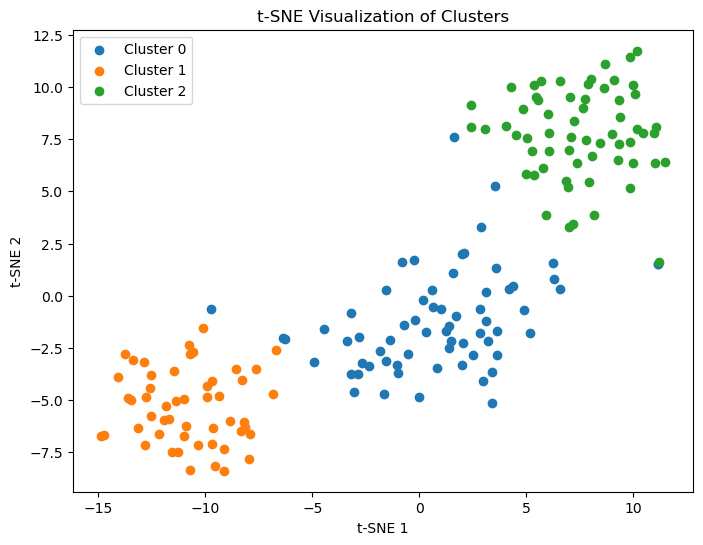

In [19]:
#plot the cluster
plt.figure(figsize=(8,6))
for cluster in np.unique(labels):
    plt.scatter(
        X_tsne[labels == cluster, 0],
        X_tsne[labels == cluster, 1],
        label = f'Cluster {cluster}'
    )

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

Some parameter to consider:
- perplexity = the number of nearest neighbors that is used in other manifold learning algorithm. Larger datasets require a larger perplexity. Use values between 5 and 50, and it must be less than the number of samples
- max_iter = maximum number of iterations for the optimization where iterations are the number of times t-SNE adjusts the positions of points in 2D to make the visualizations better.

Tips for t-SNE:
- use scaled data
- more iterations -> more stable results
- t-SNE is not for huge datasets, >50k row can be slow

## Important
t-SNE only create visual, it doesn't make a new feature or components like PCA. The n_components parameters is only to specify the points to be put on a 2D plot, not creating 2 features. t-SNE looks good for cluster because it separates clusters clearly in a visual, but it doesn't always meant the clusters are objectively better.

To make visual better, use data that is scaled or prepared, such as using PCA, especially where the distance between data points is meaningful. What you don't want to use for t-SNE:
- raw unscaled feature
- one-hot encoded data
- polynomial features
- feature-weighted model output